### Author: Aman Varma
### The following notebook does the research and share the analysis of the series called "The Office'
### For each Question a section has been created
### Solution to each question would be getting downloaded to your system in .csv file, when the script will be ran and also you can see the dataframe of those variables in the script as well.
### Please note I have provided two solutions based on my assumption for Question 2
### Any visualisation created would automatically get downloaded in your system CWD once the script is ran
### Answer to Question 6 is at the very end of the script.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
import nltk
from nltk.tokenize import word_tokenize
import json 
import re
from textblob import TextBlob

In [2]:
df=pd.read_csv(r"{cwd}\the_office_lines_scripts.csv".format(cwd=os.curdir)) 

# Data Preprocessing and exploration

In [3]:
df.isnull().values.any() #to check if null values or not

False

In [4]:
df['speaker']=df['speaker'].str.lower() #standardizing the data set 

In [5]:
michael_count=df['speaker'].str.count("mic") #Multiple Michael spellin exist

###  when the name of speaker is > 7, in most of thos case there are more than 1 person speaking and I have categorised them as multiple speakers in data set. Multiple speakers are very less. So we can conclude that there are 291 speakers.
### The number of people with name > 7 are very less and hence they are not affecting the analysis. This number is based on the analysis of name length for the whole dataset

In [6]:
df['speaker_name_length']=df['speaker'].apply(len) #To find out wether the names is greater than 7 or not. I have removed names great than 7 length

In [7]:
df.loc[df['speaker_name_length']>7,'speaker']="Multiple Speakers"

### the graph below explain the reason of choosing 7 for speaker name length

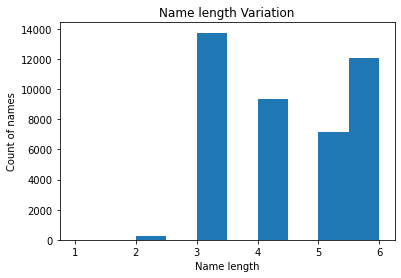

In [8]:
plt.hist(df.loc[df['speaker_name_length']<7,'speaker_name_length'])
plt.title("Name length Variation")
plt.xlabel("Name length")
plt.ylabel("Count of names")
plt.show()

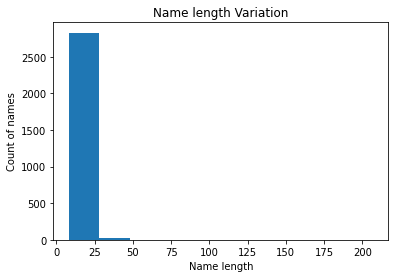

In [9]:
plt.hist(df.loc[df['speaker_name_length']>7,'speaker_name_length'])
plt.title("Name length Variation")
plt.xlabel("Name length")
plt.ylabel("Count of names")
plt.savefig(r'./Name_length_Variation.png')
plt.show()

### As see in the above graph the number of charcters with name greater than 7 is very less when compared to the whole dataset

In [10]:
df['speaker'] = df['speaker'].str.replace(r"(\[(.*?)\])","") #removing the special charcaters from the column

C:\Users\15145\AppData\Local\Temp/ipykernel_23776/3505457349.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['speaker'] = df['speaker'].str.replace(r"(\[(.*?)\])","") #removing the special charcaters from the column


In [11]:
df=df[df['deleted']==False] #removing deleted scenes as they were never aired, so we should not anlyze them

In [12]:
df= df.replace(dict.fromkeys(['michael','michel','micheal','michal','micahel','michal','michae','micael','mihael'], 'michael')) #Cleaning misspelled Characters 

In [13]:
df= df.replace(dict.fromkeys(['anglea','angels','angel'], 'angela')) #Cleaning misspelled Characters

In [14]:
df= df.replace(dict.fromkeys(['darrly','darry','daryl'], 'darryl')) #Cleaning misspelled Characters

In [15]:
df= df.replace(dict.fromkeys(['phylis','phyliss'], 'phyllis'))

In [16]:
df= df.replace(dict.fromkeys(['jim9334'], 'jim'))

In [17]:
df= df.replace(dict.fromkeys(['chares'], 'charles'))

In [18]:
df= df.replace(dict.fromkeys(['dwight.','dight'], 'dwight'))

In [19]:
season_episode=df.groupby(['season','episode']).count()

In [20]:
season_episode.reset_index(inplace=True)

In [21]:
season_episode = season_episode.drop(season_episode.columns[[2,3,4,5,6,7]], axis=1) #data Cleansing

In [22]:
season_episode_viz=pd.DataFrame(season_episode.groupby('season').size()) 

In [23]:
season_episode_viz.rename(columns={0:'episode_count'}, inplace=True)

In [24]:
season_episode_viz.reset_index(inplace=True)

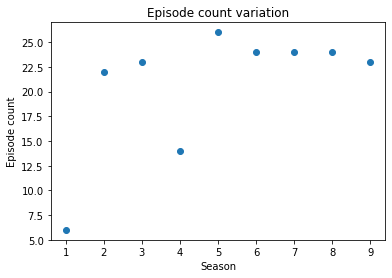

In [25]:

plt.scatter(season_episode_viz['season'], season_episode_viz['episode_count']) #graph shows the episode count versus the season
plt.title("Episode count variation")
plt.xlabel("Season")
plt.ylabel("Episode count")
plt.savefig(r'./Episode_count_variation.png')
plt.show()

### The graph above showcase the variation of the number of episodes aired in a season. Its interesting to see that in season 1 there were just 6 episodes and after the their is a big jump in the number of episdoes

In [26]:
df['line_text_new'] = df['line_text'].str.replace(r"[^a-zA-Z0-9]+", " ").str.strip() #only keep letters and alphabet in the line text 

C:\Users\15145\AppData\Local\Temp/ipykernel_23776/151388435.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['line_text_new'] = df['line_text'].str.replace(r"[^a-zA-Z0-9]+", " ").str.strip() #only keep letters and alphabet in the line text


In [27]:
df['token_line_text'] = df.apply(lambda row: nltk.word_tokenize(row['line_text_new']), axis=1) #Tokenizing the line_text column

In [28]:
with open(r'./stopwords.json') as stopwords_list:  #removing stop words
  stopwords_list_used = json.load(stopwords_list)

In [29]:
df['cleaned_line_text'] = df['token_line_text'].apply(lambda x: ([word for word in x if word not in (stopwords_list_used)]))

In [30]:
distinct_name=df['speaker'].unique()

In [31]:
distinct_name=pd.DataFrame(distinct_name)

# Question 1 : How many characters are there? What are their names?

In [32]:
distinct_name.rename(columns={0:'speaker'}, inplace=True)

In [33]:
distinct_name.to_csv(r"./Question1_Aman_Varma.csv",header=True, index = False) #names of different characters in the series

In [34]:
print(distinct_name)

     speaker
0    michael
1        jim
2        pam
3     dwight
4        jan
..       ...
286    man 2
287    man 3
288  woman 3
289  woman 4
290     joan

[291 rows x 1 columns]


In [35]:
print(distinct_name.count()) #total number of characters in the game

speaker    291
dtype: int64


### There are 291 distinct speaker in the series. This is under assumption that speaker name cannot be greater than 7. 
### I am using 7 as threshold as name of around 90% of the data set was around 7, after my preliminary analysis.


# Question 2 For each character, find out who has the most lines across all episodes

In [36]:
lead_actor=pd.DataFrame(df.groupby('speaker')['speaker'].count().nlargest(1)) #returns the info character who has spoken most lines among all episodes

In [37]:
lead_actor.rename(columns={'speaker': 'line_count'},inplace=True)

In [38]:
lead_actor.reset_index(inplace=True)

In [39]:
lead_actor.to_csv(r"./Question2_version1_Aman_Varma.csv",header=True, index = False)

In [40]:
print(lead_actor) #version1

   speaker  line_count
0  michael       11601


### Version1: "michael" has the most lines accross all episodes

In [41]:
lead_actor_per_episode=pd.DataFrame(df.groupby(['season','episode','speaker'])['speaker'].size())

In [42]:
lead_actor_per_episode.rename(columns={'speaker':'line_spoken'},inplace=True)

In [43]:
lead_actor_per_episode.reset_index(inplace=True)

In [44]:
lead_actor_max_line=pd.DataFrame(lead_actor_per_episode.sort_values('line_spoken',ascending=False).drop_duplicates(['season','episode']))

In [45]:
lead_actor_max_line.to_csv(r'./Question2_version2_Aman_Varma.csv',index=False,header=True)

In [91]:
print(lead_actor_max_line)  #version 2

      season  episode  speaker  line_spoken
1114       4       14  michael          167
943        4        4  michael          162
885        4        1  michael          160
905        4        2  michael          158
925        4        3  michael          156
...      ...      ...      ...          ...
2922       8       22     andy           41
3359       9       20     andy           39
3020       9        2      jim           39
2572       8        5     erin           36
2326       7       16  michael           33

[186 rows x 4 columns]


In [92]:
lead_actor_max_line[lead_actor_max_line['season']== 1]

,season,episode,speaker,line_spoken
58,1,5,michael,106
72,1,6,michael,106
7,1,1,michael,82
20,1,2,michael,81
42,1,4,michael,79
28,1,3,dwight,62


### For Question 2 I have shared two solutions:
### version1 is built assuming that i have to provide the name and the count of the lines of the charcter who has the spoken max lines among all episodes in total
### version2 is built assuming that i have to provide the lead character per episode, season

In [47]:
lead_actor_max_line_viz=pd.DataFrame(lead_actor_max_line.groupby(['season','speaker']).size())

In [48]:
lead_actor_max_line_viz.rename(columns={0:'frequency_speaker'}, inplace=True)

In [49]:
lead_actor_max_line_viz.reset_index(inplace=True)

### Graph showing the lead charcters recurrence in a season per episode

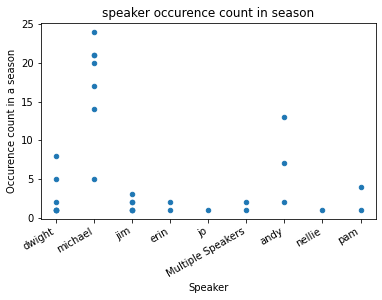

In [50]:
plt.scatter(lead_actor_max_line_viz['speaker'], lead_actor_max_line_viz['frequency_speaker'],s=20)
plt.title("speaker occurence count in season")
plt.xlabel("Speaker")
plt.ylabel("Occurence count in a season")
plt.gcf().autofmt_xdate()
plt.savefig(r'./speaker_occurence_count_season.png')
plt.show()

### The above Graph showcase the number of times in a season(Epsidoe count) a charcter was speaking the most line

# Question 3 What is the average of words per line for each character?

In [51]:
df['count_words_line_text']=df['cleaned_line_text'].apply(lambda x: len(x))

In [52]:
words_per_line=pd.DataFrame(df.groupby('speaker')['count_words_line_text'].mean())

In [53]:
words_per_line.reset_index(inplace=True)

In [54]:
words_per_line.to_csv(r"./Question3_Aman_Varma.csv",header=True, index = False)

In [55]:
print(words_per_line)

               speaker  count_words_line_text
0    Multiple Speakers               4.950802
1                 a.j.               2.750000
2                 abby               2.416667
3                  abe              11.000000
4                actor               3.333333
..                 ...                    ...
286            woman 4               9.500000
287              women               6.333333
288             worker               2.000000
289               zeke               4.533333
290               zion               6.000000

[291 rows x 2 columns]


### Below graph Shows that maijority of the speakers speaks less thann 5 words in a line on average

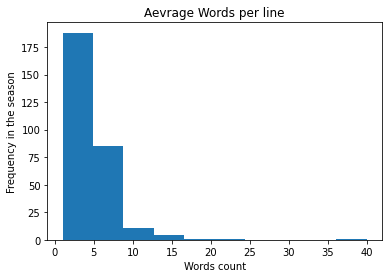

In [56]:
plt.hist(words_per_line['count_words_line_text'])
plt.title("Aevrage Words per line")
plt.xlabel("Words count")
plt.ylabel("Frequency in the season")
plt.savefig(r'./Aevrage_Words_per_line.png')
plt.show()


# Question 4 What is the most common word per character

In [57]:
words_used_by_character=pd.DataFrame(df.groupby('speaker').agg({'cleaned_line_text':'sum'})) #concatenating the list based on group of speakers

In [58]:
words_used_by_character.reset_index(inplace=True)

In [59]:
# Function to calculate the highest frequency for a character
def highest_word_counter(speaker, all_words):  
    '''
    Function to calculate the highest frequency for a character
       
       Parameters
       --------------
       speaker- String
       Name of the character
       
       all_words- List
       list of words spoken by the characater 
       --------------

    '''
    freq={}
    for word in all_words:
        if word in freq:
            freq[word]+=1
        else:
            freq[word]=1
    most_used_word=max(freq,key=freq.get)
    return speaker,most_used_word,freq[most_used_word] 


In [60]:
most_used_word_character= list(words_used_by_character.apply(lambda x:highest_word_counter(x['speaker'], x['cleaned_line_text']), axis=1))

In [61]:
most_used_word_frame=pd.DataFrame(most_used_word_character,columns=['speaker','high_frequency_word','frequency'])

In [62]:
most_used_word_frame.to_csv(r"./Question4_Aman_Varma.csv",header=True, index = False)

In [63]:
print(most_used_word_frame) #printing the name of the speaker the highest frequency word and the frequency

               speaker high_frequency_word  frequency
0    Multiple Speakers                   I       1033
1                 a.j.              laughs          2
2                 abby                Yeah          2
3                  abe                   I          2
4                actor                 Hey          2
..                 ...                 ...        ...
286            woman 4                 Jim          2
287              women             general          1
288             worker                   I          4
289               zeke              Dwight          6
290               zion                   I          2

[291 rows x 3 columns]


# Question 5 The average percent of lines each character contributed each episode per season.

In [64]:
character_contribution=pd.DataFrame(df.groupby(['season','speaker']).size()) # calculating the number of line sopken by a speaker in a season

In [65]:
character_contribution.rename(columns={0:'Total_line_count_per_character'},inplace=True)

In [66]:
character_contribution.reset_index(inplace=True)

In [67]:
season_line_contribution=pd.DataFrame(df.groupby(['season']).size()) #calculating the number of total lines spoken in a season

In [68]:
season_line_contribution.rename(columns={0:'Total_line_count'}, inplace=True)

In [69]:
season_line_contribution.reset_index(inplace=True)

## Graph showcasing the total lines in the season variation.

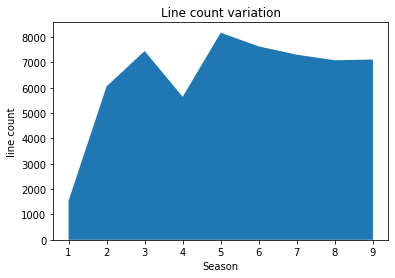

In [70]:
plt.stackplot(season_line_contribution['season'],season_line_contribution['Total_line_count'])
plt.title("Line count variation")
plt.xlabel("Season")
plt.ylabel("line count")
plt.savefig(r'./Line_count_variation.png')
plt.show()

In [71]:
contribution_per_season=pd.merge(character_contribution,season_line_contribution,on='season') 

### Contribution percentage of each character in each episode per season is defined as total line spoken by speaker in a particular season/ total number of lines spoken in that season * 100

In [72]:
contribution_per_season['Contribution percent of characters']=contribution_per_season['Total_line_count_per_character']/contribution_per_season['Total_line_count']*100

In [73]:
contribution_per_season.to_csv(r"./Question5_Aman_Varma.csv",header=True, index = False)

In [74]:
print(contribution_per_season)

     season            speaker  Total_line_count_per_character  \
0         1  Multiple Speakers                              67   
1         1             angela                              23   
2         1             darryl                              15   
3         1             dwight                             222   
4         1                jan                              38   
..      ...                ...                             ...   
587       9            woman 2                               2   
588       9            woman 3                               1   
589       9            woman 4                               2   
590       9             worker                               1   
591       9               zeke                              15   

     Total_line_count  Contribution percent of characters  
0                1536                            4.361979  
1                1536                            1.497396  
2                1536      

In [75]:
michael_presence_viz=contribution_per_season[contribution_per_season['speaker']=='michael']

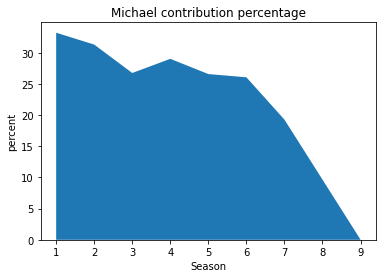

In [76]:
plt.stackplot(michael_presence_viz['season'],michael_presence_viz['Contribution percent of characters']) #michael contribution in series 
plt.title("Michael contribution percentage")
plt.xlabel("Season")
plt.ylabel("percent")
plt.savefig(r'./Michael_contribution_percentage.png')
plt.show()

### From the above data we found that some of the character who were leading the show in the start of the season were contributing very less during the last season of the series for eg michael

# Question 6 Come up with 2-3 interesting questions yourself surrounding the dataset


### Question 1
### it would be fun to find the number of time michael says "Thats what she said quote" in the series. 

In [86]:
michael = df[df['speaker']=='michael']

In [87]:
michael.reset_index(inplace=True)

### The below function is used to find a particular text in lines spoken by the character, so we can use the below function to also find the relationship of the character in the series

In [88]:
def michael_say_count(word):
    '''
    Function prints the number of time michael has said "that what she said quote"
    -------------------
    word: Dataframe object
    it capature the information per character
    '''
    
    flag = 0
    for j in range(0,len(word)):
        x = re.search('that\'s what she said',michael['line_text'][j])
        y = re.search('That\'s what she said',michael['line_text'][j])
        if type(x)==re.Match:
            flag = flag + 1
        if type(y)==re.Match:
            flag = flag + 1
    
    return flag
    
print(michael_say_count(michael))

21


### From the Above result we can conclude that michael has said "thats what she said quote 21 times in the series"

### Question 2
### Showcase the sentiment of the series based on the line characters speak

In [80]:
def polarity(text):
    '''
    Function calculate the sentiment score of a particular line based on the words used in that line.
    ------------------------------------------
    text: string
    it accepts the line spoken by the scharcter

    '''
    return TextBlob(text).sentiment.polarity

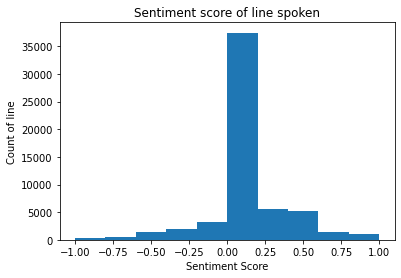

In [81]:
df['polarity_score'] = df['line_text'].apply(lambda x : polarity(x))
img=plt.hist(df['polarity_score'])
plt.title("Sentiment score of line spoken")
plt.xlabel("Sentiment Score")
plt.ylabel("Count of line")
plt.savefig(r'./Sentiment_score_of_line_spoken.png')
plt.show()


### The Office is a show which has a lot of critic becuase of the content or the topics on which the characters speaks, hence I have create a graph above which showcase the sentiment score of the lines. From the graph we can conclude that there were a fare amount of line which carry with themselves a negative tone. 


## Question 3 ( Theoritical Question)
### if you are allowed add some more data point to the data set what would you add and what would be its impact on analysis
### Answer 3
### If I am allowed to add more data points to the given data set I would like to add atleast the Following information:
### 1. Director of the Episode.
### 2. IMDB rating of the season.
### 3. Tweets of the audience on the show
### From the above extra data points , I would like find the sentiments of the Series among the audience, this would allow me to judge what audience would have wanted in future.
### Besides that I would like to see if their could be a correlation between a charcater and the imdb rating of the series. In this way I would be able to know what characters I should give more lines in future episode, to enhance the audience experience.
### I would like to see how the change in director afecting the rating or the audience sentiment for the show.
